In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm, binom

#### coin toss interview question:
pretend youre a referee in a match, and have to flip a coin

how do you figure out if a coin is fair or not?
what if you find out your coin is unfair?

P(H) = 1/4
P(T) = 3/4

you have no other option, but flip the coin over and over

what would you do to make sure you have a fair coin toss?

John Von Neuman: says to toss the coin twice

P(H, H) = 1/4 * 1/4

or

P(H, T) = 1/4 * 3/4

or 

P(T, H) = 3/4 * 1/4

or 

P(T, T) = 3/4 * 3/4

HT & TH have same probability
so toss the coin twice.. if H comes before T, then 1 guy wins, if T comes before H, then the other guy wins.. if it is any other outcome, repeat process again. this guarantees a fair outcome

<BarContainer object of 10 artists>

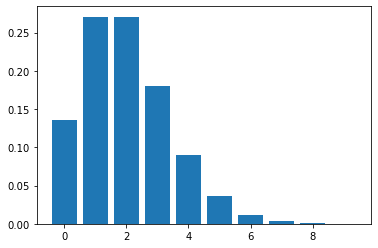

In [3]:
#1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
stats.poisson(2)

x=np.arange(0,10)
y=stats.poisson(2).pmf(x)
plt.bar(x,y)

In [4]:
#1a. What is the probability that no cars drive up in the noon hour?
stats.poisson(2).pmf(0)

#pmf b/c only interested in 0 cars 

0.1353352832366127

In [8]:
#1b. What is the probability that 3 or more cars come through the drive through?
stats.poisson(2).sf(2)

#sf is exclusive (not incl the 2)

0.32332358381693654

In [7]:
#1c. How likely is it that the drive through gets at least 1 car?
stats.poisson(2).sf(0)

0.8646647167633873

In [42]:
#alternate 1c:
1-stats.poisson(2).pmf(0)

0.8646647167633873

<BarContainer object of 5 artists>

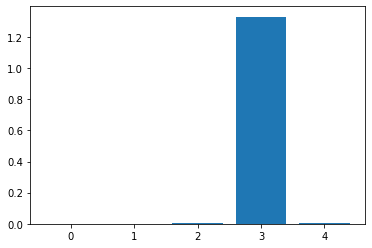

In [22]:
#2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
mean = 3
sd = .3

stats.norm(mean, sd)

x=np.arange(0,5)
y=stats.norm(mean, sd).pdf(x)
plt.bar(x,y)

In [23]:
#2a. What grade point average is required to be in the top 5% of the graduating class?
stats.norm(mean, sd).ppf(.95)

3.4934560880854417

In [25]:
#2a alternate:
stats.norm(mean, sd).isf(.05)

3.4934560880854417

In [26]:
#2b. What GPA constitutes the bottom 15% of the class?
stats.norm(mean, sd).ppf(.15)

2.689069983151863

In [44]:
#2b alternate
stats.norm(mean, sd).isf(.85)

2.689069983151863

In [43]:
#confirm w/ simulation method
np.quantile(np.random.normal(3, 0.3, 10_000), 0.15)


2.6890474471447727

In [29]:
#2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
round(stats.norm(mean, sd).ppf(.2), 2), round(stats.norm(mean, sd).ppf(.3),2)

#Yes, student w/ 2.8 gpa qualifies for this scholarship.

(2.75, 2.84)

- 1st decile: 0-10 percentile
- 2nd decile: 10-20 percentile
- 3rd decile: 20-30 percentile

In [45]:
#alternate 2c:
stats.norm(3, 0.3).ppf([0.2,0.3]) #yes 2.8 qualifies

array([2.74751363, 2.84267985])

In [46]:
#simulation method
np.quantile(np.random.normal(3, 0.3, 10_000), [0.2, 0.3])

array([2.75752069, 2.84978705])

In [31]:
#2d. If I have a GPA of 3.5, what percentile am I in?
stats.norm(mean, sd).cdf(3.5)

0.9522096477271853

In [48]:
#simulation method
(np.random.normal(3, 0.3, 10_000) < 3.5).mean() *100 #to get percentile

95.41

In [33]:
#3. A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
#How likely is it that this many people or more click through?

n_trials = 4326
prob = .02

stats.binom(n_trials, prob).sf(96) 
#binomial dist b/c based on attempts vs successes
#s/f b/c probability our random variable take on a value greater than a given point
#(96) b/c you want to incl the 97 (clicks >=97)

0.1397582363130086

In [49]:
#simulation:
#0 = no click, 1 = click
clicks = np.random.choice([0,1], (10_000, 4326), p = [0.98, 0.02])
(clicks.sum(axis = 1) >= 97).mean()

0.1419

In [34]:
#4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
#What is the probability that at least one of your first 60 answers is correct?

n_trials = 60
p = 1/100 #or .01

stats.binom(n_trials, p).sf(0)

0.4528433576092388

In [50]:
#simulation
#0 = incorrect, 1 = correct
answers = np.random.choice([0, 1], (10_000, 60), p =[0.99, 0.01])
(answers.sum(axis=1) >= 1).mean()

0.4532

In [51]:
#5. The codeup staff tends to get upset when the student break area is not cleaned up. 
#Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
#and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.
#How likely is it that the break area gets cleaned up each day? 

students_in_break_area = (3 * 22 * .9)
prob = .03

stats.binom(students_in_break_area, prob).sf(0)

0.8342199288437355

Text(0.5, 0, 'Number of times area is cleaned per day')

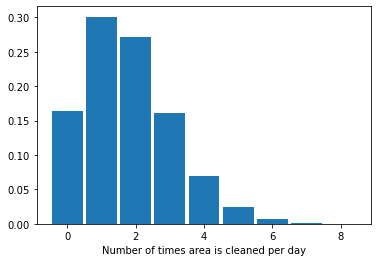

In [64]:
#visualize:

x = np.arange(0,9)
y = stats.binom(students_in_break_area, prob).pmf(x)
plt.bar(x,y, width = 0.9)
plt.xlabel('Number of times area is cleaned per day')

In [52]:
#5a. How likely is it that it goes two days without getting cleaned up?
stats.binom(students_in_break_area*2, .03).pmf(0)

#how many students would visit the are in 2 days? (n*2)
#pmf(0) won't get cleaned

0.026821436301629097

In [56]:
#5b. All week? (5 days not getting cleaned)
stats.binom(students_in_break_area*5, .03).pmf(0)

0.00011781621791055166

In [57]:
#5b alternate

1-stats.binom(students_in_break_area*5, .03).sf(0)

0.00011781621791051577

In [58]:
#6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
#After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts 
#is normally distributed with a mean of 15 and standard deviation of 3. 
#If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
#what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
#Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

#stp 1: convert mean and std from ppl to 'minutes':
#mean number of minutes = 15 * 2 = 30 mins
#max time i can be in line w/out getting late to class = 60-15-10=35 mins

stats.norm(30, 6).cdf(35)

0.7976716190363569

In [59]:
#simulation
(np.random.normal(30, 6, 100_000) < 35).mean()

0.79645

In [65]:
#7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. 
#For the following questions, calculate the answer based on modeling the employees salaries 
#with a normal distribution defined by the calculated mean and standard deviation 
#then compare this answer to the actual values present in the salaries dataset.

import env
import pandas as pd


url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE emp_no IN (
    SELECT emp_no FROM dept_emp
    WHERE to_date > NOW()
) AND to_date > NOW()
'''
    
salaries = pd.read_sql(query, url)

In [66]:
#7a. What percent of employees earn less than 60,000?
mean = salaries.salary.mean()
sd = salaries.salary.std()

stats.norm(mean, sd).cdf(60000)

0.24385742480214423

In [67]:
#7b. What percent of employees earn more than 95,000?
stats.norm(mean, sd).cdf(95000)

0.9079118080019595

In [68]:
#7c. What percent of employees earn between 65,000 and 80,000?
stats.norm(mean, sd).cdf([65000, 80000])

array([0.34270292, 0.67776349])

In [69]:
np.diff(stats.norm(mean, sd).cdf([65000, 80000]))

array([0.33506057])

In [70]:
#7d. What do the top 5% of employees make?
stats.norm(mean, sd).isf(.05)

100484.64454102777

In [71]:
#alternate:
salaries.salary.quantile(.95)

104225.84999999998

<AxesSubplot:>

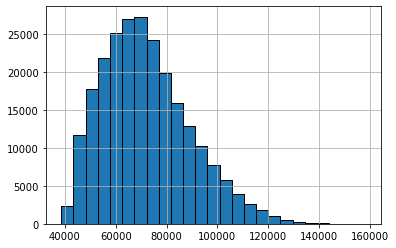

In [72]:
#are these salaries really distributed normally?
salaries.salary.hist(bins = 25, ec = 'k')
#ec = edge color

#a little skewed